In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.integrate

In [39]:
def u_func(t,uₒ,vₒ,N2,θ,f,Ninf):
    fstar = (f**2+θ**2*Ninf)**(0.5)
    return uₒ*np.cos(fstar*t)+(f*vₒ-N2*θ)/fstar*np.sin(fstar*t)

In [40]:
def v_func(t,uₒ,vₒ,N2,θ,f,Ninf):
    fstar = (f**2+θ**2*Ninf)**(0.5)
    return vₒ-(f*uₒ)/(fstar)*np.sin(fstar*t)+(f**2*vₒ-f*N2*θ)/fstar**2*(np.cos(fstar*t)-1)                                                                       

In [41]:
def N_func(t,uₒ,vₒ,N2,θ,f,Ninf):
    fstar = (f**2+θ**2*Ninf)**(0.5)
    return N2+θ*N2*((uₒ)/(fstar)*np.sin(fstar*t)-(f*vₒ-N2*θ)/fstar**2*(np.cos(fstar*t)-1))

In [102]:
θ = 10**(-4)
f = 10**(-4)
N2 = 10**(-7)*(1-θ)
Ninf = 10**(-7)
ϕ = 0
uₒ = (θ*Ninf/f)*np.cos(ϕ)
vₒ = (θ*Ninf/f)*np.sin(ϕ)
fstar = (f**2+θ**2*Ninf)**(0.5)

In [99]:
t = np.arange(0,2*np.pi/fstar+1,1)

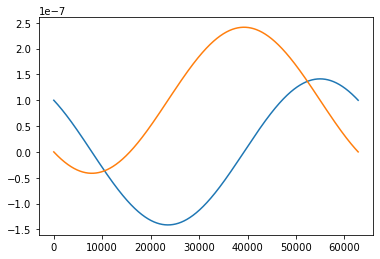

In [100]:
plt.plot(t,u_func(t,uₒ,vₒ,N2,θ,f,Ninf))
plt.plot(t,v_func(t,uₒ,vₒ,N2,θ,f,Ninf))
# plt.gca().set_aspect('equal')

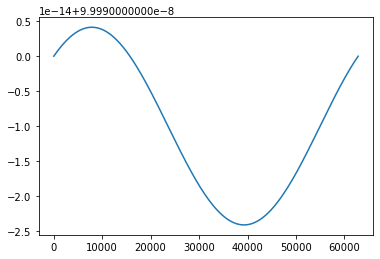

In [101]:
plt.plot(t,N_func(t,uₒ,vₒ,N2,θ,f,Ninf))

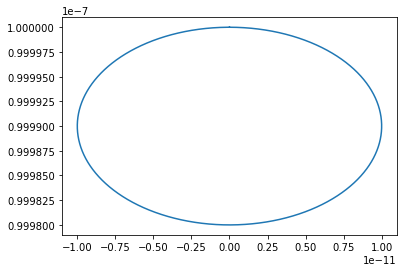

In [46]:
plt.plot(u_func(t,uₒ,vₒ,N2,θ,f,Ninf),v_func(t,uₒ,vₒ,N2,θ,f,Ninf))
# plt.gca().set_aspect('equal')

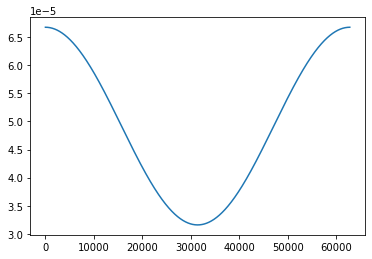

In [47]:
t = np.arange(0,2*np.pi/10**(-4),1)
plt.plot(t,(81.7*10**(-4))**2-0.5*(7.7*10**(-4))**4/(10**(-4))**2*(1-np.cos(10**(-4)*t)))

In [105]:
def tilted_oscillations_non_shear(v,t,f,θ,Ninf):
    u,v,b = v
    return [f*v+b*θ,-f*u,-θ*Ninf*u] 

In [106]:
a=10**(-4) #parameter 1 f
b=10**(-1) #parameter 2 theta
c=10**(-7) #parameter 3 5.7 is reset value N^2
fstar = (a**2+b**2*c)**(0.5)
s = (b**2*c)/a**2
gamma = (1+s)**(-1)
fstar = (a**2+b**2*c)**(0.5)
u0 = fstar*(gamma*c*b)/(a**2)*0.1
v0 = 0#(gamma*c*b)/a*0.1
b0 = 0 #(v0*b)/a
y0=[u0,v0,b0] #initial conditions
N=10000
t = np.linspace(0, 2*np.pi/a, N) #time
sol = scipy.integrate.odeint(tilted_oscillations_non_shear, y0, t, args=(a,b,c)) #numerical solution

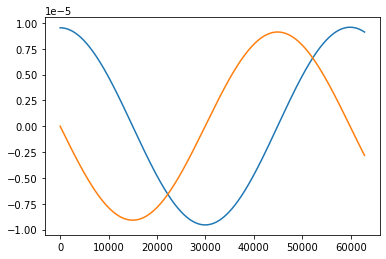

In [107]:
plt.plot(t,sol[:,0])
plt.plot(t,sol[:,1])

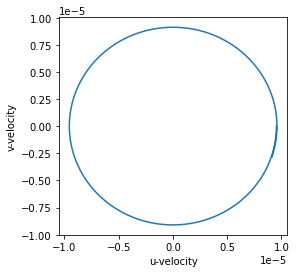

In [108]:
plt.plot(sol[:,0],sol[:,1])
plt.xlabel("u-velocity")
plt.ylabel("v-velocity")
plt.gca().set_aspect('equal')

Text(0.5, 0, 'Time (seconds)')

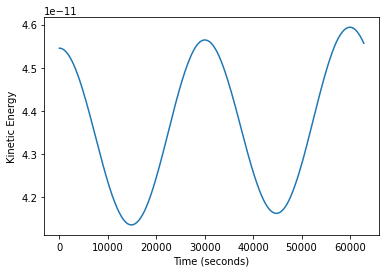

In [109]:
plt.plot(t,(sol[:,0]**2+sol[:,1]**2)/2)
plt.ylabel("Kinetic Energy")
plt.xlabel("Time (seconds)")